







# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
#ph = gpd.read_file('gadm36_PHL_1.shp')
#ph.head(50)

ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

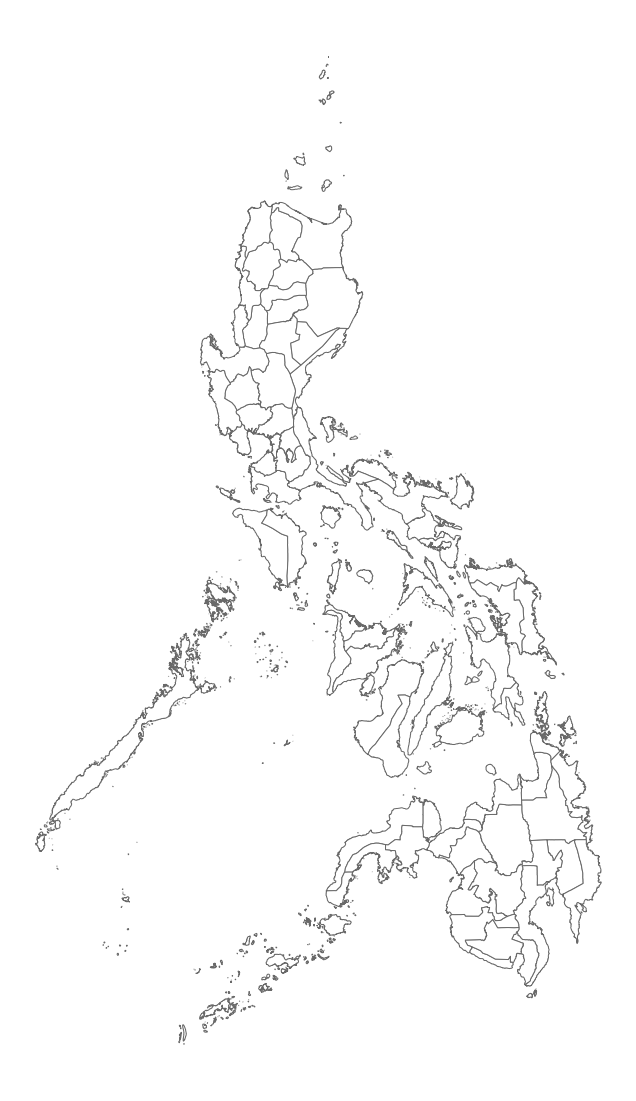

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
# Read GeoJSON file
#healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
#healthsites.head()

healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

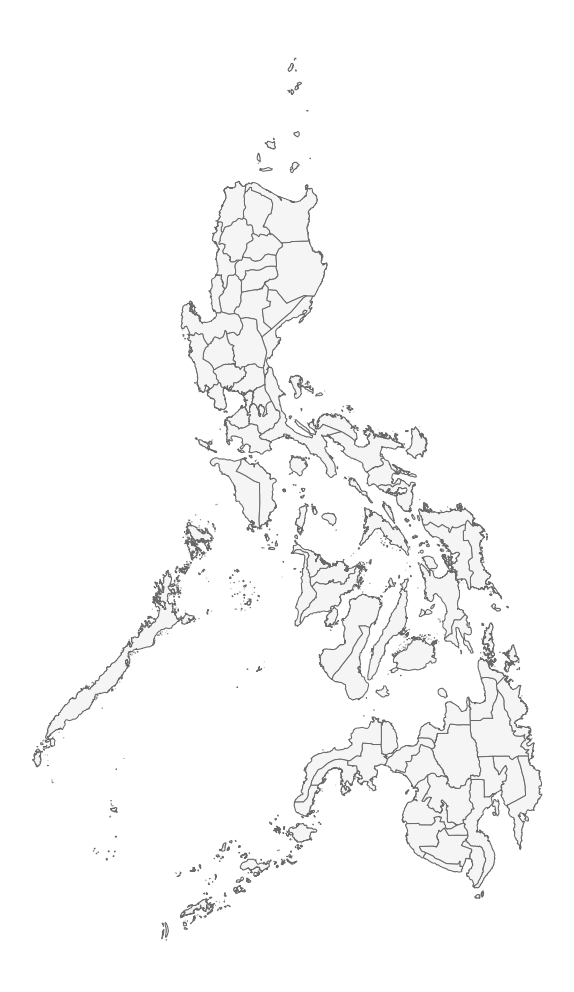

In [7]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

In [8]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


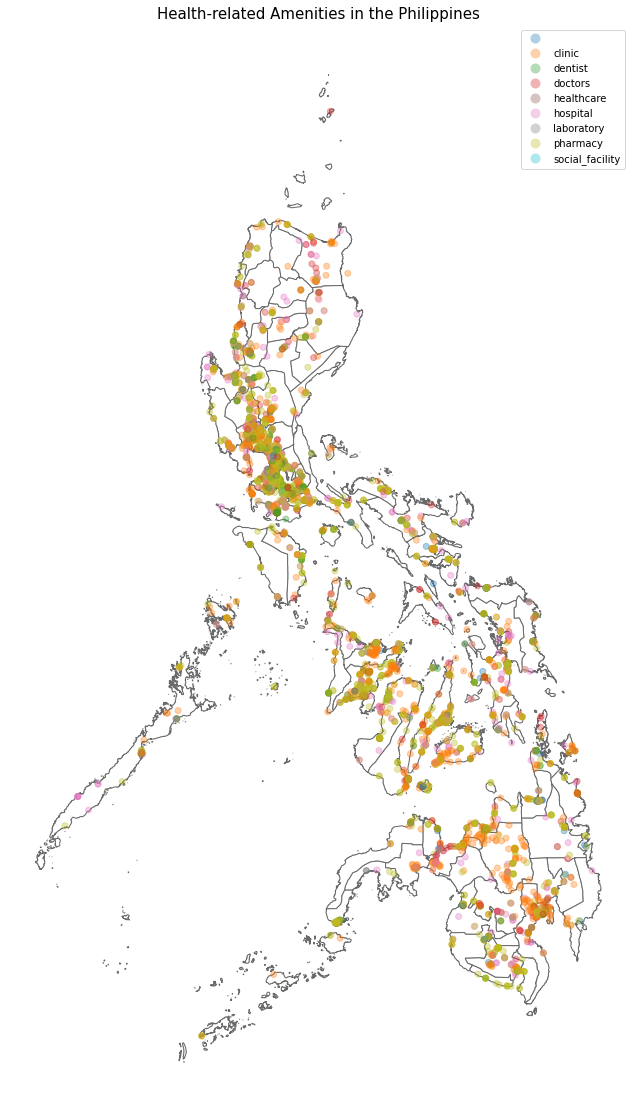

In [9]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [10]:
healthsites.describe(include=object)

,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [11]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

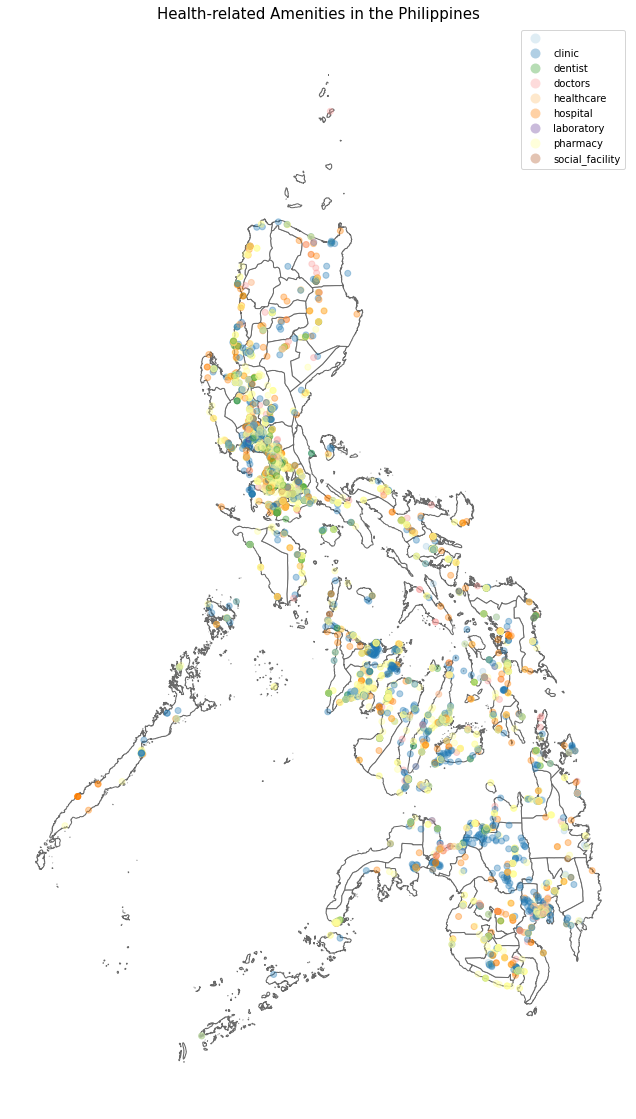

In [12]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

<AxesSubplot:>

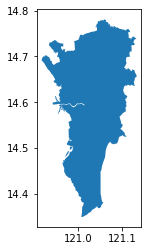

In [13]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

In [14]:
ph['NAME_1'].unique()

array(['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
       'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes',
       'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan',
       'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz',
       'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley',
       'Davao del Norte', 'Davao del Sur', 'Davao Oriental',
       'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao',
       'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga',
       'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte',
       'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila',
       'Misamis Occidental', 'Misamis Oriental', 'Mountain Province',
       'Negros Occidental', 'Negros Oriental', 'North Cotabato',
       'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga',
       'Pangasinan', 'Quezon', 'Quirino', 'Riza

## Laguna Province  
Let's locate first where Laguna is located in the Philippines.

<AxesSubplot:>

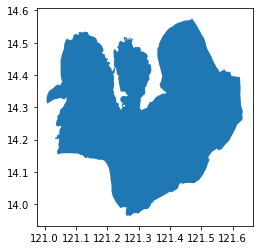

In [15]:
lgn = ph[ph.NAME_1=="Laguna"]
lgn.plot()

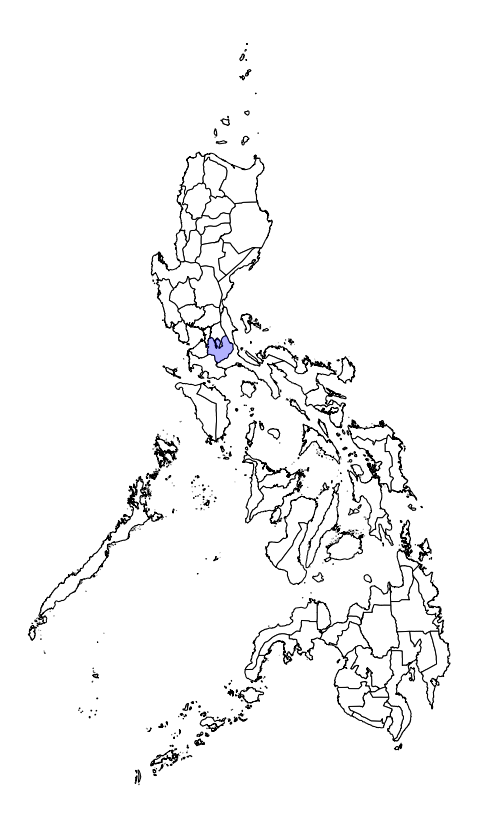

In [16]:
ax = ph.plot(figsize=(15, 15), color='white', edgecolor='k')
lgn.plot(ax=ax, color='blue', alpha=0.3);
ax.axis('off');

Now, let's identify what amenities are available in Laguna. First, we clean the data through spatial join by selecting only Laguna in the ph geodataframe.

In [17]:
# This spatial join will return the points within a polygon
laguna = gpd.sjoin(healthsites, lgn, op='within')
laguna.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
9,1018210574,node,21.0,,pharmacy,,Marcelo H. del Pilar Avenue,,,96334310.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
19,7328321185,node,15.0,,pharmacy,,Manila East Road,,,89875377.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
71,531872352,way,12.0,,hospital,,,,,52847963.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
92,4375248398,node,12.0,,pharmacy,,,,,78426672.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
93,707487260,way,18.0,,clinic,,Manila East Road,,,89875377.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


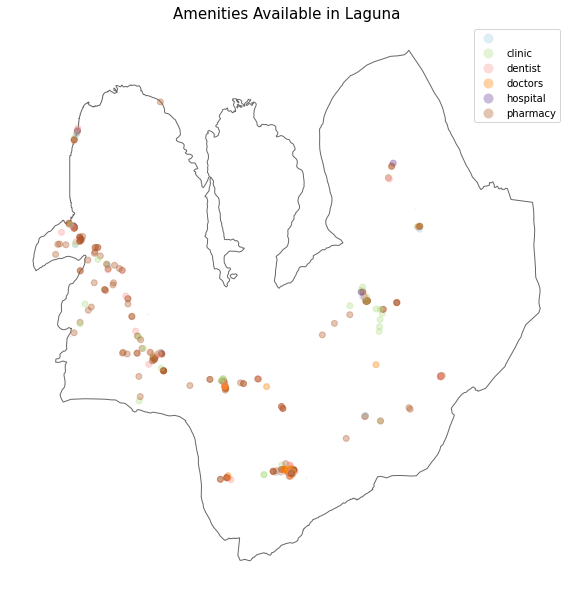

In [18]:
fig = plt.figure(figsize=(10, 25))
ax = fig.add_subplot(111)
lgn.plot(ax=ax, color='white', edgecolor='dimgray')
laguna.plot('amenity',ax=ax,alpha=0.35, cmap="Paired", legend=True)
ax.set_title('Amenities Available in Laguna', fontsize=15)
ax.axis('off');

From the figure above, we can see that the available amenities in Laguna are:  
* Clinic
* Dentist
* Doctors
* Hospital
* Pharmacy

Let's try to visualize each available amenity.

<AxesSubplot:title={'center':'Pharmacy Amenities'}>

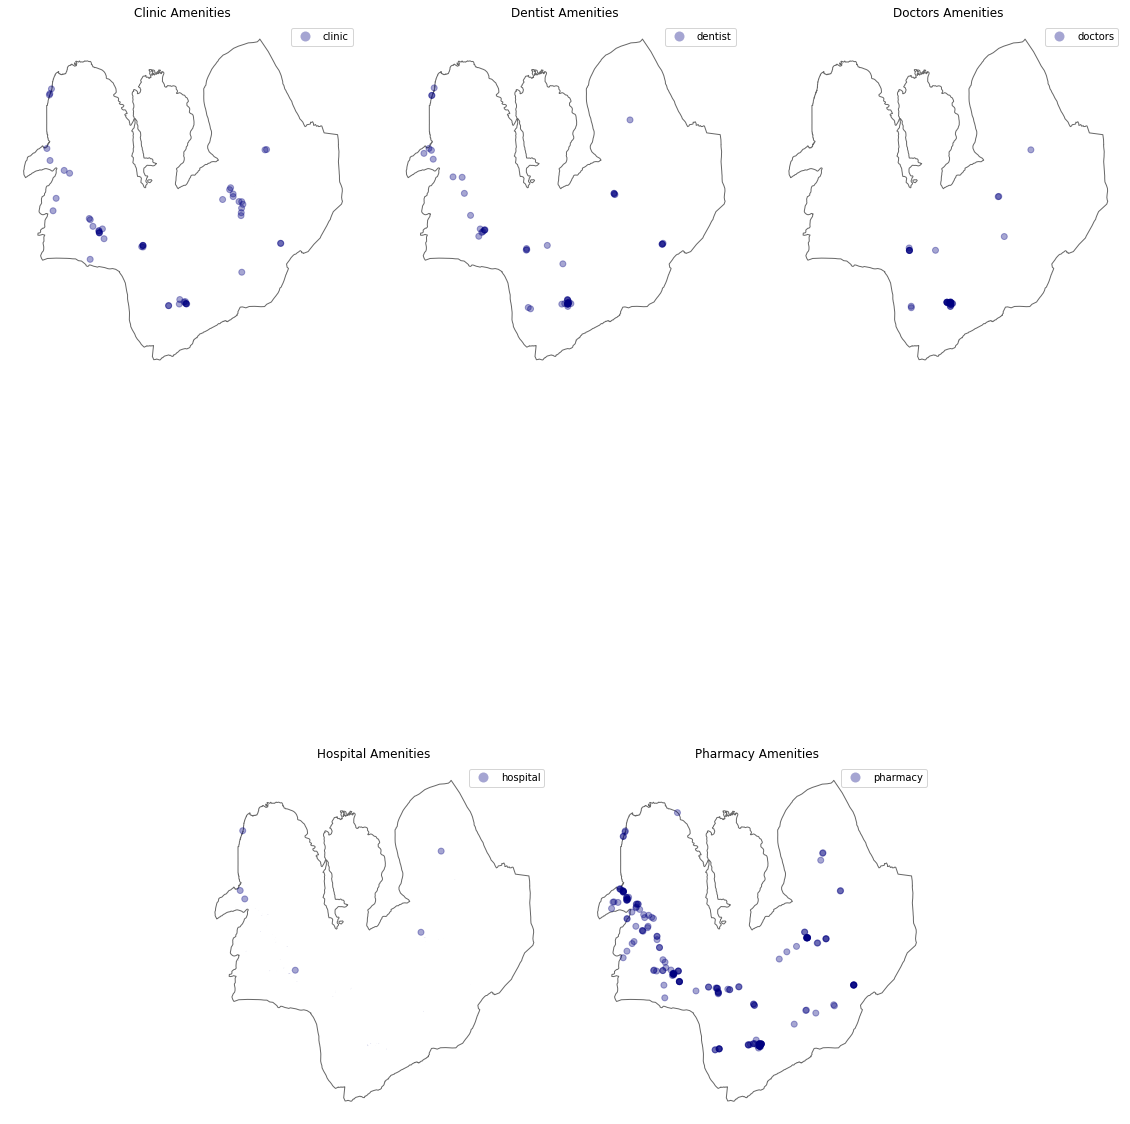

In [19]:
#query each amenity and store in separate variables
lgn_clinic = laguna[laguna['amenity'] == 'clinic']
lgn_dentist = laguna[laguna['amenity'] == 'dentist']
lgn_doctors = laguna[laguna['amenity'] == 'doctors']
lgn_hospital = laguna[laguna['amenity'] == 'hospital']
lgn_pharmacy = laguna[laguna['amenity'] == 'pharmacy']

#create subplots
fig = plt.figure(figsize=(20,25))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax1.axis('off');
ax2.axis('off');
ax3.axis('off');
ax4.axis('off');
ax5.axis('off');

#set title for each plot
ax1.title.set_text('Clinic Amenities')
ax2.title.set_text('Dentist Amenities')
ax3.title.set_text('Doctors Amenities')
ax4.title.set_text('Hospital Amenities')
ax5.title.set_text('Pharmacy Amenities')

lgn.plot(ax=ax1, color='white', edgecolor='dimgray')
lgn_clinic.plot('amenity',ax=ax1,alpha=0.35, cmap="jet", legend=True)

lgn.plot(ax=ax2, color='white', edgecolor='dimgray')
lgn_dentist.plot('amenity',ax=ax2,alpha=0.35, cmap="jet", legend=True)

lgn.plot(ax=ax3, color='white', edgecolor='dimgray')
lgn_doctors.plot('amenity',ax=ax3,alpha=0.35, cmap="jet", legend=True)

lgn.plot(ax=ax4, color='white', edgecolor='dimgray')
lgn_hospital.plot('amenity',ax=ax4,alpha=0.35, cmap="jet", legend=True)

lgn.plot(ax=ax5, color='white', edgecolor='dimgray')
lgn_pharmacy.plot('amenity',ax=ax5,alpha=0.35, cmap="jet", legend=True)

We can see in the figure above that Pharmacy is more evident in Laguna. 

## Albay Province  
Let's repeat the process and check the amnenities in Albay.

<AxesSubplot:>

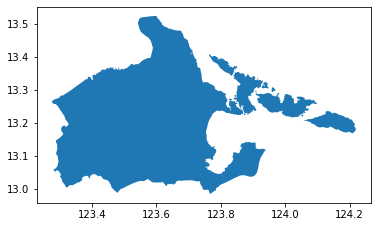

In [20]:
alb = ph[ph.NAME_1=="Albay"]
alb.plot()

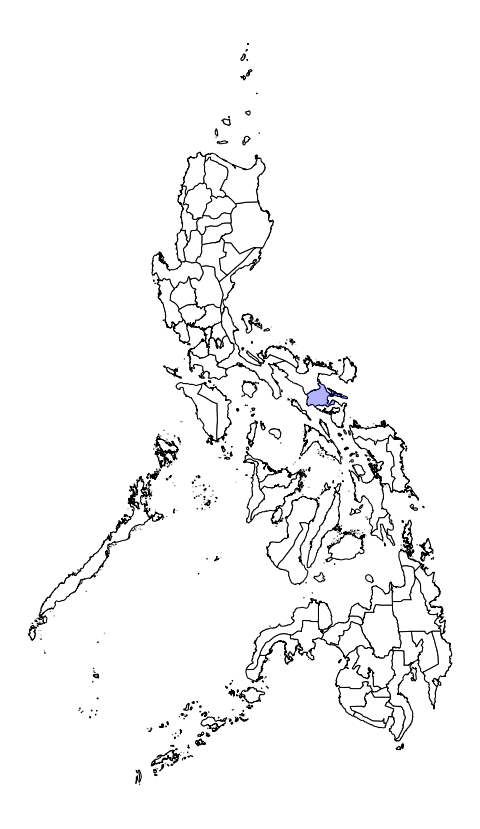

In [21]:
ax = ph.plot(figsize=(15, 15), color='white', edgecolor='k')
alb.plot(ax=ax, color='blue', alpha=0.3);
ax.axis('off');

Now, let's identify what amenities are available in Albay. Just as we did in Laguna, we clean the data through spatial join by selecting only Albay in the ph geodataframe.

In [22]:
albay = gpd.sjoin(healthsites, alb, op='within')
albay.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
8,3940989272,node,9.0,,dentist,,,,,36520157.0,...,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL
68,3992051810,node,9.0,,clinic,,,,,37041306.0,...,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL
198,7141109686,node,25.0,,,blood_check,,Estevez Memorial Hospital Inc. Clinical Labora...,,79731773.0,...,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL
384,4258075297,node,31.0,,hospital,general,Tomas Cabiles Avenue,,,94875690.0,...,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL
489,3909316830,node,9.0,,clinic,,,,,36349859.0,...,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL


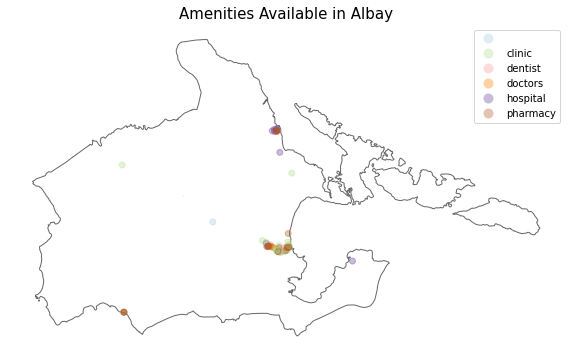

In [23]:
fig = plt.figure(figsize=(10, 25))
ax = fig.add_subplot(111)
alb.plot(ax=ax, color='white', edgecolor='dimgray')
albay.plot('amenity',ax=ax,alpha=0.35, cmap="Paired", legend=True)
ax.set_title('Amenities Available in Albay', fontsize=15)
ax.axis('off');

<AxesSubplot:title={'center':'Pharmacy Amenities'}>

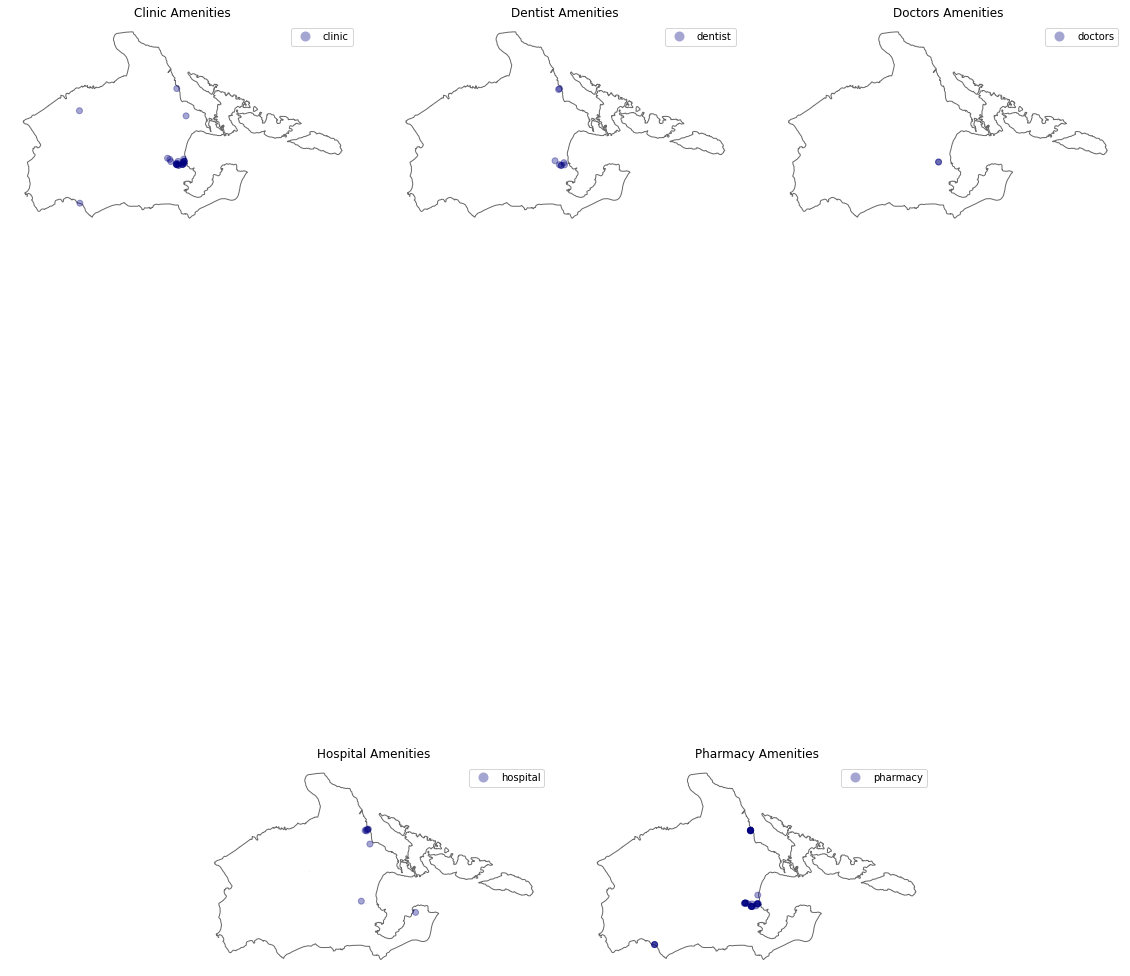

In [24]:
#query each amenity and store in separate variables
alb_clinic = albay[albay['amenity'] == 'clinic']
alb_dentist = albay[albay['amenity'] == 'dentist']
alb_doctors = albay[albay['amenity'] == 'doctors']
alb_hospital = albay[albay['amenity'] == 'hospital']
alb_pharmacy = albay[albay['amenity'] == 'pharmacy']

#create subplots
fig = plt.figure(figsize=(20,25))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax1.axis('off');
ax2.axis('off');
ax3.axis('off');
ax4.axis('off');
ax5.axis('off');

#set title for each plot
ax1.title.set_text('Clinic Amenities')
ax2.title.set_text('Dentist Amenities')
ax3.title.set_text('Doctors Amenities')
ax4.title.set_text('Hospital Amenities')
ax5.title.set_text('Pharmacy Amenities')

alb.plot(ax=ax1, color='white', edgecolor='dimgray')
alb_clinic.plot('amenity',ax=ax1,alpha=0.35, cmap="jet", legend=True)

alb.plot(ax=ax2, color='white', edgecolor='dimgray')
alb_dentist.plot('amenity',ax=ax2,alpha=0.35, cmap="jet", legend=True)

alb.plot(ax=ax3, color='white', edgecolor='dimgray')
alb_doctors.plot('amenity',ax=ax3,alpha=0.35, cmap="jet", legend=True)

alb.plot(ax=ax4, color='white', edgecolor='dimgray')
alb_hospital.plot('amenity',ax=ax4,alpha=0.35, cmap="jet", legend=True)

alb.plot(ax=ax5, color='white', edgecolor='dimgray')
alb_pharmacy.plot('amenity',ax=ax5,alpha=0.35, cmap="jet", legend=True)

In the figure above, clinic is more evident in the Albay province.

## Manila

<AxesSubplot:>

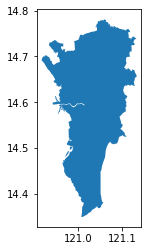

In [25]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

In [26]:
manila = gpd.sjoin(healthsites, mm, op='within')
manila.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
15,796284976,way,9.0,,dentist,,,,,84795442.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


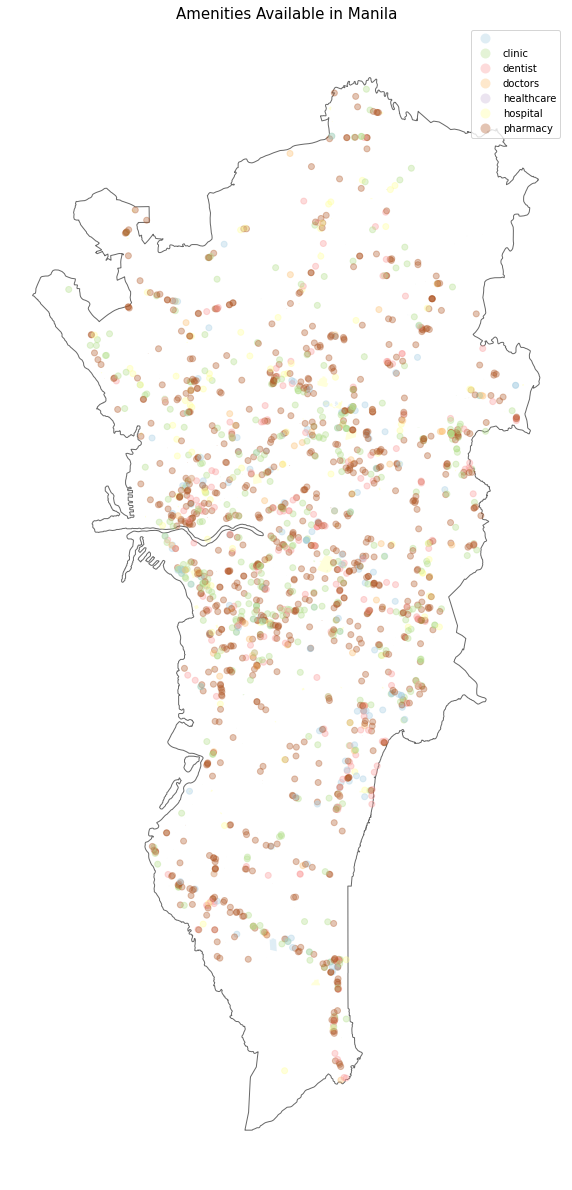

In [27]:
fig = plt.figure(figsize=(10, 25))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
manila.plot('amenity',ax=ax,alpha=0.35, cmap="Paired", legend=True)
ax.set_title('Amenities Available in Manila', fontsize=15)
ax.axis('off');

<AxesSubplot:>

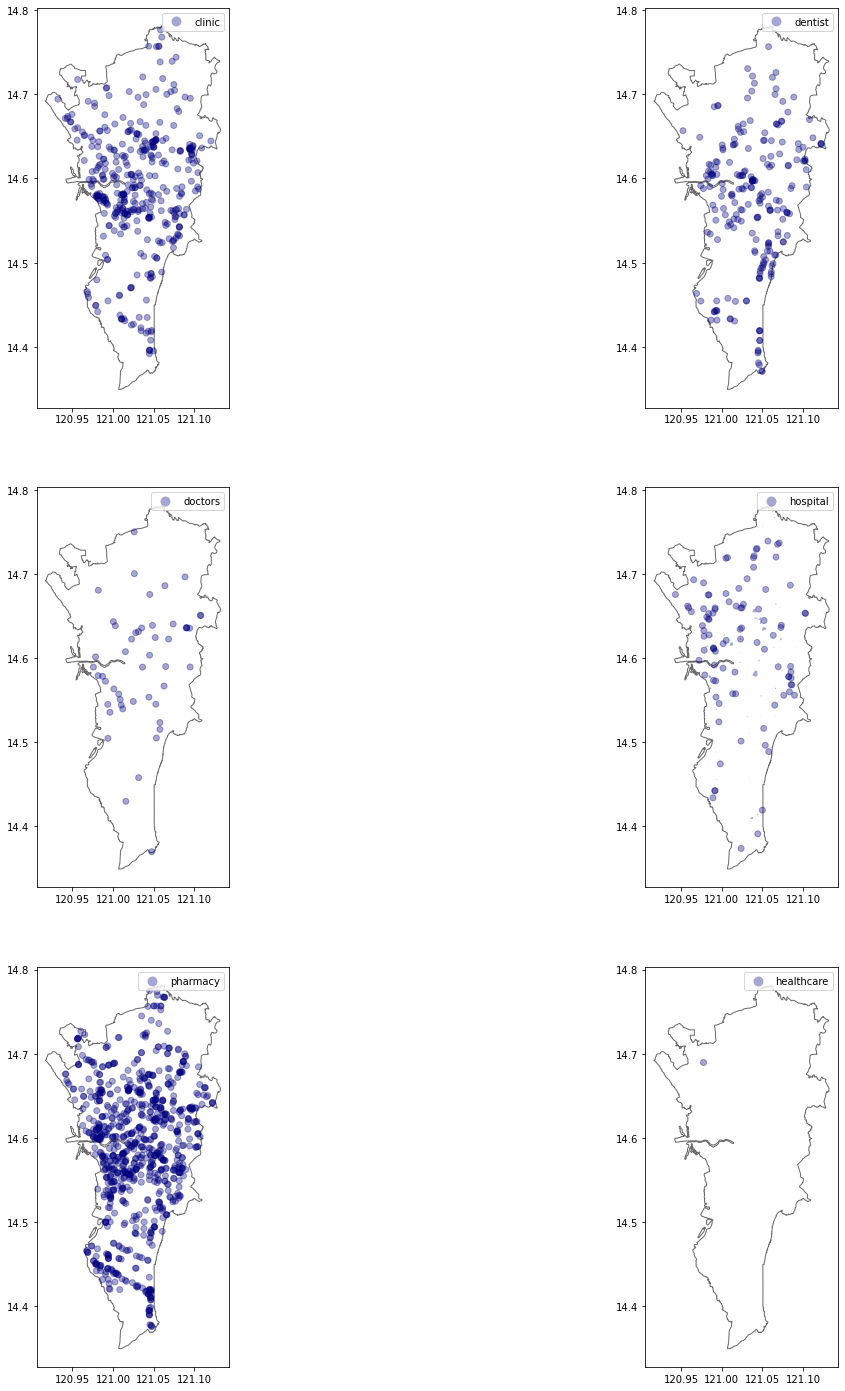

In [28]:
#query each amenity and store in separate variables
mm_clinic = manila[manila['amenity'] == 'clinic']
mm_dentist = manila[manila['amenity'] == 'dentist']
mm_doctors = manila[manila['amenity'] == 'doctors']
mm_hospital = manila[manila['amenity'] == 'hospital']
mm_pharmacy = manila[manila['amenity'] == 'pharmacy']
mm_healthcare = manila[manila['amenity'] == 'healthcare']

#create subplots
fig, axarr  = plt.subplots(3,2,figsize=(20,25))

mm.plot(ax=axarr[0][0], color='white', edgecolor='dimgray')
mm_clinic.plot('amenity',ax=axarr[0][0],alpha=0.35, cmap="jet", legend=True)

mm.plot(ax=axarr[0][1], color='white', edgecolor='dimgray')
mm_dentist.plot('amenity',ax=axarr[0][1],alpha=0.35, cmap="jet", legend=True)

mm.plot(ax=axarr[1][0], color='white', edgecolor='dimgray')
mm_doctors.plot('amenity',ax=axarr[1][0],alpha=0.35, cmap="jet", legend=True)

mm.plot(ax=axarr[1][1], color='white', edgecolor='dimgray')
mm_hospital.plot('amenity',ax=axarr[1][1],alpha=0.35, cmap="jet", legend=True)

mm.plot(ax=axarr[2][0], color='white', edgecolor='dimgray')
mm_pharmacy.plot('amenity',ax=axarr[2][0],alpha=0.35, cmap="jet", legend=True)

mm.plot(ax=axarr[2][1], color='white', edgecolor='dimgray')
mm_healthcare.plot('amenity',ax=axarr[2][1],alpha=0.35, cmap="jet", legend=True)

In [29]:
mm_healthcare

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
8813,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


Being the national capital region in the Philippines, it is expected that there will a lot of ammenities to be found in Manila which is reflected in the figure above.